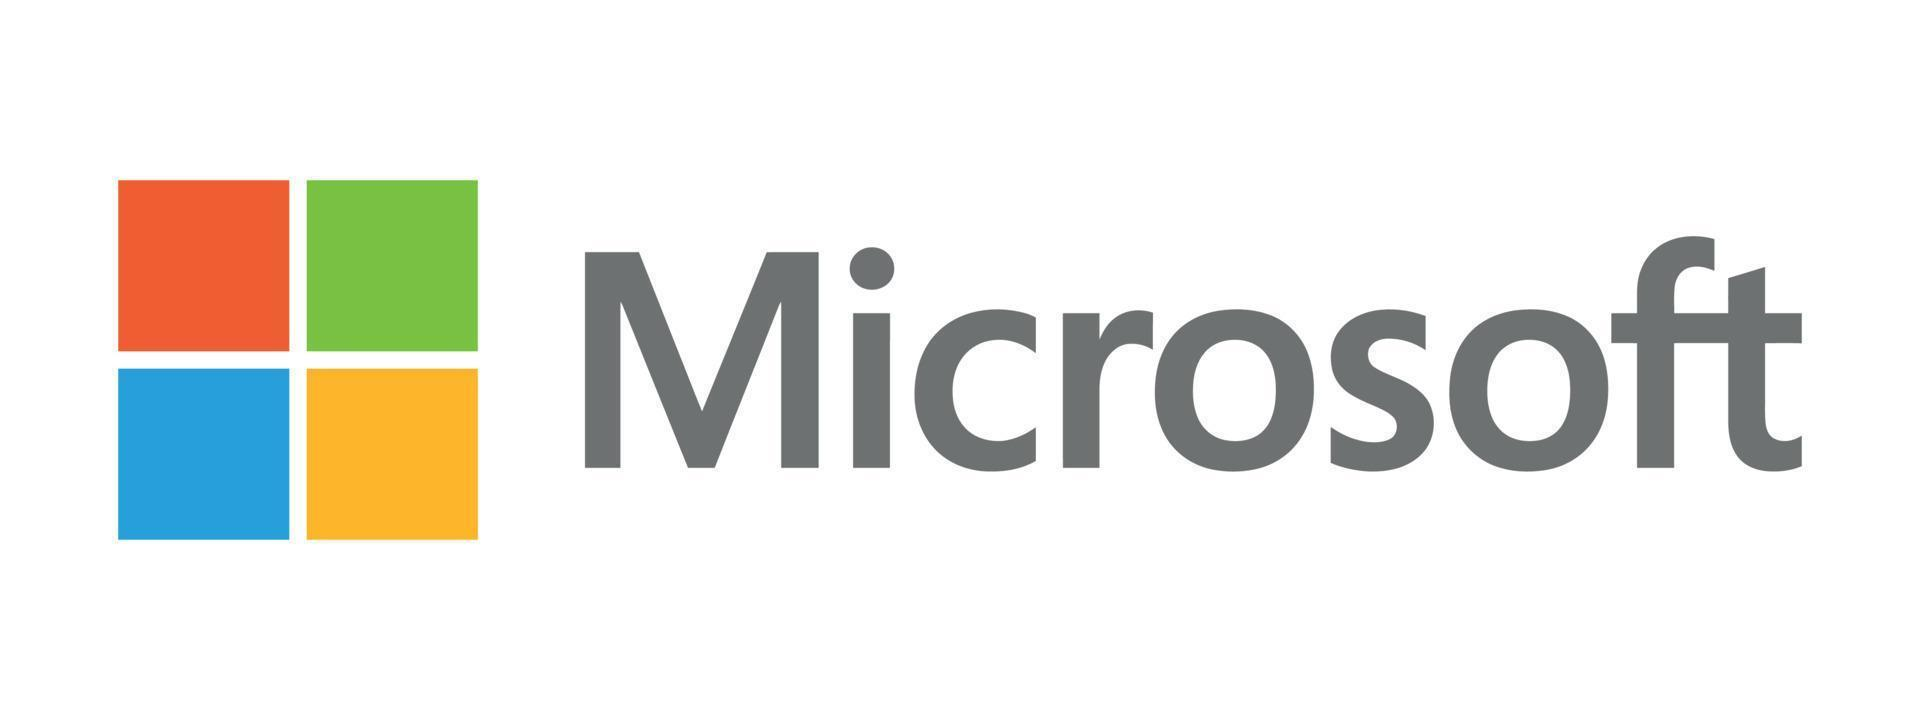

# Microsoft Movie Analysis

**Author:** Lynn Rotich

***

## Overview

Microsoft wants to create a movie studio that produces original movies that engage their audience and ensure success. To support this goal, this project analyzes movie industry data such as movie genres, release months, movie runtimes and audience ratings to learn more about the current trends in the market. The analysis revealed that combination genres such as Comedy,Documentary and Fantasy received higher audience ratings.Additionally, releasing films in top performing months such as May, June and July was found to maximize the revenue potential, while producing films with a 90-120 minutes runtime also enhanced viewer satisfaction. Based on these findings, Microsoft is able to focus on producing high-perfoming genres within high perfoming months while also factoring in the optimal movie runtimes. To further strengthen the analysis, additional data such as best platforms to release their movies on and which actors are highly ranked by the audience would provide better insights which would enable Microsoft to make strategic decisions as they look into exploring the movie industry.


## Business Problem

Microsoft wants to create a movie studio to produce original movies that aims at engaging their audience while making the experience enjoyable. However, they lack experience in identifying the types of films that would ensure success for their new movie studio. Their goal is to understand what customers prefer and the current trends in the movie industry, enabling them to generate actionable insights through data.

***
This project will explore the industry data to answer questions such as:
* What movie genres generate the highest audience ratings?
* Which months tend to have the most successful movie releases?
* What is the optimal movie runtime based on audience ratings and revenue?
***

These questions are important from Microsoft's business perspective because they will help the company strategically position its new movie studio in a saturated and competitive market. With these insights, Microsoft will be better equipped to engage its audience and achieve profitability at an earlier stage.

## Data Understanding

This project uses multiple datasets from various movie industry sources, including The Numbers, IMDb and TheMovieDB (TMDb). These datasets contain information on movies such as runtimes, audience ratings, box office revenues, genres, production budgets, titles and release dates. Each dataset focuses on a different aspect of movie performance.

The data will be cleaned and analyzed to extract actionable insights that will help Microsoft determine the best path for ensuring success of their new movie studio.


In [ ]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from matplotlib.ticker import FuncFormatter

%matplotlib inline

### Movie Budget Dataset

---



This dataset contains information relating to the movie release dates, titles, Production budgets (the cost of making the movie), Domestic gross (ticket sales in the U.S. and Canada) and Worldwide gross (both international and domestic ticket sales).

In [ ]:
# Loading the movie budgets data

movie_budget_df = pd.read_csv('tn.movie_budgets.csv.gz')
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
# General information on the dataset

movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
# Checking for missing values in the dataset

movie_budget_df.isna().sum()

,0
id,0
release_date,0
movie,0
production_budget,0
domestic_gross,0
worldwide_gross,0


There are no missing values in the dataset


In [ ]:
# Data types of the movie budget dataset

movie_budget_df.dtypes

,0
id,int64
release_date,object
movie,object
production_budget,object
domestic_gross,object
worldwide_gross,object


### Movie Ratings Dataset

---



This dataset shows the average ratings for different movies.

In [ ]:
# Loading the movie ratings dataset

movie_ratings_df = pd.read_csv('movie_ratings.csv')
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
# General Information on the dataset

movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
# Checking for missing values in the dataset

movie_ratings_df.isna().sum()

,0
movie_id,0
averagerating,0
numvotes,0


There are no missing values in the dataset

In [ ]:
# Data types of the movie ratings dataset

movie_ratings_df.dtypes

,0
movie_id,object
averagerating,float64
numvotes,int64


### Movie Dataset

This dataset shows the Runtime Minutes (Duration of the movie), Genres, Movie Titles and Movie Start year.

In [ ]:
# Loading the movie dataset

movie_df = pd.read_csv('movie_basics.csv')
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
# General information on the dataset

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
# Checking for missing values in the dataset

movie_df.isna().sum()

,0
movie_id,0
primary_title,1
original_title,22
start_year,0
runtime_minutes,31739
genres,5408


There are missing values in four columns:
- primary_Title - 1 row of data is missing
- original_title - 22 rows of data are missing
- runtime_minutes - 31,739 rows of data are missing
- genres - 5,408 rows of data are missing

In [ ]:
# Data types of the movie dataset

movie_df.dtypes

,0
movie_id,object
primary_title,object
original_title,object
start_year,int64
runtime_minutes,float64
genres,object


## Data Preparation

Preparing the data from the movie budget, movie ratings and movie basics dataset for analysis required data cleaning. Some columns in the datasets were stored as incorrect data types so they needed to be converted to the appropriate data types to ensure accurate analysis. Merging the movie and movie ratings datasets enabled the analysis to provide more comprehensive insights that Microsoft can use in their decision-making process.

***
Below are the steps taken across the different datasets:
- I dropped rows with missing data in primary_title, genres, production_budget, domestic_gross, worldwide_gross and runtime_minutes columns to enable me to better understand movie performance.
- I created a new column release_month by extracting the month from release_date to identify the best months of the year to release movies.
- For missing values in the runtime_minutes columm, I chose to use the median to reduce the impact of extreme values on the analysis.
- I found outliers in the runtime_minutes, production_budget, domestic_gross and worldwide_gross columns. I set a specific range for runtime_minutes to be used for the analysis and extablished minimum values for the other columns.

These actions helped ensure that the analysis was based on a realistic and reliable dataset, ultimately improving the quality and accuracy of the insights generated for modeling.

### Movie Budget Dataset Preparation

Checking for duplicate rows

In [ ]:
movie_budget_df.duplicated().sum()

# There are no duplicates in the movie budget dataset

np.int64(0)

Renaming the movie column to primary_title

In [ ]:
movie_budget_df.rename(columns={'movie': 'primary_title'}, inplace=True)

#### Release date cleaning

Converting release_date column to a datetime format.

In [ ]:
# Converting to a datetime format

movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'], errors='coerce')

Filtering the DataFrame to keep movies released after 2000

In [ ]:
# Filtering to get movies released past 2000

movie_budget_df = movie_budget_df[movie_budget_df['release_date'].dt.year >= 2000]

Dropping the rows with the invalid release dates

In [ ]:
# Dropping rows with release dates before 2000

movie_budget_df.dropna(subset=['release_date'], inplace=True)

In [ ]:
# Checking if the release date has been converted to the correct data type

movie_budget_df['release_date'].dtype

dtype('<M8[ns]')

Creating a new column to help analyze the best month to release movies later on.

In [ ]:
# Creating release month column

movie_budget_df['release_month'] = movie_budget_df['release_date'].dt.month

#### Production_budget cleaning

In [ ]:
# List of columns to clean

dollar_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Removing the $ and , then converting to int
for col in dollar_cols:
    movie_budget_df[col] = movie_budget_df[col].replace('[\$,]', '', regex=True).astype(int)

Keeping rows with a production budget, domestic gross and worldwide gross of more than $10,000

In [ ]:
movie_budget_df = movie_budget_df[(movie_budget_df['production_budget'] >= 10000) &
                                 (movie_budget_df['domestic_gross'] >= 10000) &
                                 (movie_budget_df['worldwide_gross'] >= 10000)].copy()

#### Confirming the details of the cleaned dataset

In [ ]:
# Confirming the data types are showing correctly

movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3777 entries, 0 to 5767
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 3777 non-null   int64         
 1   release_date       3777 non-null   datetime64[ns]
 2   primary_title      3777 non-null   object        
 3   production_budget  3777 non-null   int64         
 4   domestic_gross     3777 non-null   int64         
 5   worldwide_gross    3777 non-null   int64         
 6   release_month      3777 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 221.3+ KB


In [ ]:
# Confirming the changes have been effected - Adding the release_month column,
# Removing the $ and , symbols, Changing the release_date format into a datetime format

movie_budget_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12


In [ ]:
# Statistical information for numeric values in the dataset

movie_budget_df.describe()

,id,release_date,production_budget,domestic_gross,worldwide_gross,release_month
count,3777.000000,3777,3.777000e+03,3.777000e+03,3.777000e+03,3777.000000
mean,50.019328,2009-05-11 19:39:36.171564800,3.882443e+07,4.858670e+07,1.121339e+08,6.844586
min,1.000000,2000-01-12 00:00:00,1.000000e+04,1.001100e+04,1.002400e+04,1.000000
25%,25.000000,2004-12-10 00:00:00,8.300000e+06,3.915251e+06,9.470209e+06,4.000000
50%,49.000000,2009-04-24 00:00:00,2.160000e+07,2.295858e+07,4.166648e+07,7.000000
75%,75.000000,2013-09-27 00:00:00,5.000000e+07,5.970006e+07,1.217783e+08,10.000000
max,100.000000,2019-06-14 00:00:00,4.250000e+08,9.366622e+08,2.776345e+09,12.000000
std,28.626677,NaN,4.731484e+07,7.464212e+07,1.964617e+08,3.412332


In [ ]:
# Confirming there are no missing values

movie_budget_df.isna().sum()

,0
id,0
release_date,0
primary_title,0
production_budget,0
domestic_gross,0
worldwide_gross,0
release_month,0


### Movie Dataset Preparation

#### Primary Title Cleaning

Dropping the missing row in the primary_title column.

In [ ]:
# Dropping row with missing value

movie_df.dropna(subset=['primary_title'], inplace=True)

Filling the missing values in the original_title column with the primary_title data.

In [ ]:
movie_df['original_title'] = movie_df['original_title'].fillna(movie_df['primary_title'])

#### Runtime Minutes cleaning

Filtering out extreme outliers

In [ ]:
# Defining the runtime minutes range

min_runtime = 35
max_runtime = 300

#Filtering the dataframe to keep only data within the range

movie_df_run = movie_df.loc[(movie_df['runtime_minutes'] >= min_runtime) & (movie_df['runtime_minutes'] <= max_runtime)].copy()

Filling missing runtime values with the median

In [ ]:
median_run = movie_df_run['runtime_minutes'].median()
movie_df_run['runtime_minutes'] = movie_df_run['runtime_minutes'].fillna(median_run)

In [ ]:
# Assigning the original with the filtered data

movie_df = movie_df_run

#### Genre Cleaning

Dropping the rows with missing genres.

In [ ]:
movie_df = movie_df.dropna(subset=['genres'])

#### Confirming the details of the cleaned dataset

In [ ]:
# General information on the cleaned dataset

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107311 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         107311 non-null  object 
 1   primary_title    107311 non-null  object 
 2   original_title   107311 non-null  object 
 3   start_year       107311 non-null  int64  
 4   runtime_minutes  107311 non-null  float64
 5   genres           107311 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.7+ MB


In [ ]:
# Statistical information about the dataset

movie_df.describe()

,start_year,runtime_minutes
count,107311.000000,107311.000000
mean,2014.380399,87.834649
std,2.647932,24.755527
min,2010.000000,35.000000
25%,2012.000000,73.000000
50%,2014.000000,88.000000
75%,2017.000000,100.000000
max,2022.000000,300.000000


In [ ]:
# Confirming there are no missing details

movie_df.isna().sum()

,0
movie_id,0
primary_title,0
original_title,0
start_year,0
runtime_minutes,0
genres,0


### Movie Ratings Dataset Preparation



Confirming if there are any duplicates in the dataset

In [ ]:
movie_ratings_df.duplicated().sum()

# There are no duplicates in the dataset

np.int64(0)

In [ ]:
# Statistical information about the dataset

movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [ ]:
# Confirming there are no missing values

movie_ratings_df.isna().sum()

,0
movie_id,0
averagerating,0
numvotes,0


#### Merging the movie_ratings_df and movie_df dataframes

In [ ]:
merged_movie_df = pd.merge(movie_df, movie_ratings_df, on='movie_id', how='inner')

In [ ]:
merged_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65426 entries, 0 to 65425
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65426 non-null  object 
 1   primary_title    65426 non-null  object 
 2   original_title   65426 non-null  object 
 3   start_year       65426 non-null  int64  
 4   runtime_minutes  65426 non-null  float64
 5   genres           65426 non-null  object 
 6   averagerating    65426 non-null  float64
 7   numvotes         65426 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [ ]:
merged_movie_df.isna().sum()

,0
movie_id,0
primary_title,0
original_title,0
start_year,0
runtime_minutes,0
genres,0
averagerating,0
numvotes,0


## Data Modeling


---

I analyzed and modeled the data through Exploratory Data Analysis (EDA) using descriptive statistics such as .describe() and .info() to better understand the data and handle any missing values before proceeding with data modeling.

After applying descriptive statistics, I further cleaned the data by slicing it using different ranges and dropping rows that were skewing the analysis.

The business objective is to understand what makes a movie successful and to provide insights based on various factors such as movie runtimes, genres and best months to release movies in order to produce relevant and actionable results.


### Exploratory Data Analysis (EDA)

#### Genres that Generate High Audience Ratings

In [ ]:
genres_revenue = merged_movie_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
genres_revenue.head(10)

,averagerating
genres,
"Comedy,Documentary,Fantasy",9.4
"Documentary,Family,Musical",9.3
Game-Show,9.0
"Documentary,News,Sport",8.8
"Documentary,News,Reality-TV",8.8
"Action,Adventure,Musical",8.7
"Adventure,Crime",8.5
"Biography,History,Music",8.5
"Mystery,News,Thriller",8.4


In [ ]:
# Creating a dataframe of the top 10 genres

genres_df = pd.DataFrame({
    'genres': [
        'Comedy,Documentary,Fantasy',
        'Documentary,Family,Musical',
        'Game‑Show',
        'Documentary,News,Sport',
        'Documentary,News,Reality‑TV',
        'Action,Adventure,Musical',
        'Adventure,Crime',
        'Biography,History,Music',
        'Mystery,News,Thriller',
        'Music,Musical,Romance'
    ],
    'average_rating': [9.4, 9.3, 9.0, 8.8, 8.8, 8.7, 8.5, 8.5, 8.4, 8.4]
})

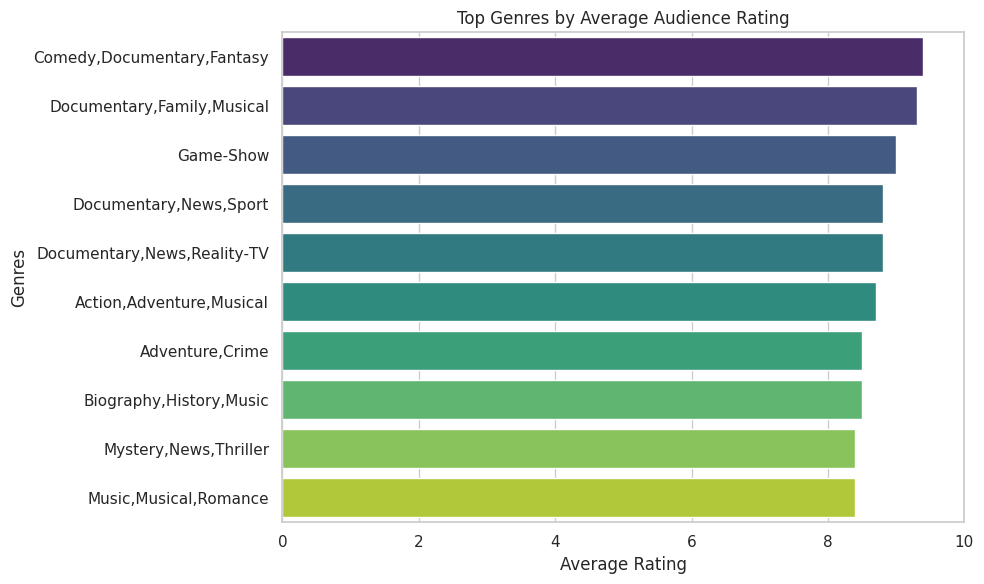

In [ ]:
# Vertical Bar plot
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='average_rating', y='genres', data=genres_df , palette='viridis', hue='genres')

# Setting the title, xlabel and ylabel
ax.set_title('Top Genres by Average Audience Rating')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Genres')

ax.set_xlim(0, 10)

plt.tight_layout()
plt.show()

#### Months that have the most succesful releases

In [ ]:
month_release = movie_budget_df.groupby('release_month')['worldwide_gross'].mean().sort_values(ascending=False)
month_release.head()

,worldwide_gross
release_month,
5,1.977713e+08
6,1.667221e+08
7,1.651209e+08
11,1.640754e+08
12,1.570404e+08


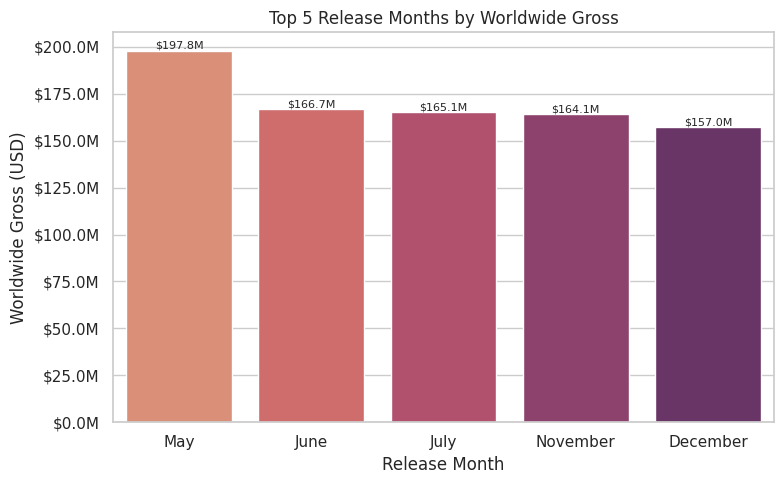

In [ ]:
# Converting to a dataframe of the top 5 months with the highest worldwide gross for plotting

month_release_df = pd.DataFrame({
    'release_month': [5, 6, 7, 11, 12],
    'worldwide_gross': [197.8, 166.7, 165.1, 164.1, 157.0]
})

# Converting release_month numbers to the month names

month_release_df['month_name'] = month_release_df['release_month'].apply(lambda x: calendar.month_name[x])


# Horizontal Bar plot
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='month_name', y='worldwide_gross',
                 data=month_release_df.sort_values(by='worldwide_gross', ascending=False)
                 , palette='flare', hue='month_name', legend=False)

# Formatting the y-axis tick labels to millions

ax.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f'${v:,.1f}M'))

# Adding labels at the top of the bars

for container in ax.containers:
    ax.bar_label(container, fmt="$%.1fM", label_type='edge', fontsize=8)

# Setting the title, xlabel and ylabel
ax.set_title('Top 5 Release Months by Worldwide Gross')
ax.set_xlabel('Release Month')
ax.set_ylabel('Worldwide Gross (USD)')

plt.tight_layout()
plt.show()

#### Best Movie Runtimes Based on Audience Ratings

In [ ]:
runtime_ranges = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
labels = ['<30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '240+']

merged_movie_df['runtime_group'] = pd.cut(movie_df['runtime_minutes'], bins=runtime_ranges, labels=labels)

movie_runtime = merged_movie_df.groupby('runtime_group', observed=True)['averagerating'].mean().sort_values(ascending=False)
movie_runtime

,averagerating
runtime_group,
91-120,6.389236
<30,6.328365
31-60,6.322089
121-150,6.319810
61-90,6.302823
211-240,6.239130
151-180,6.226087
240+,6.158824
181-210,5.968182


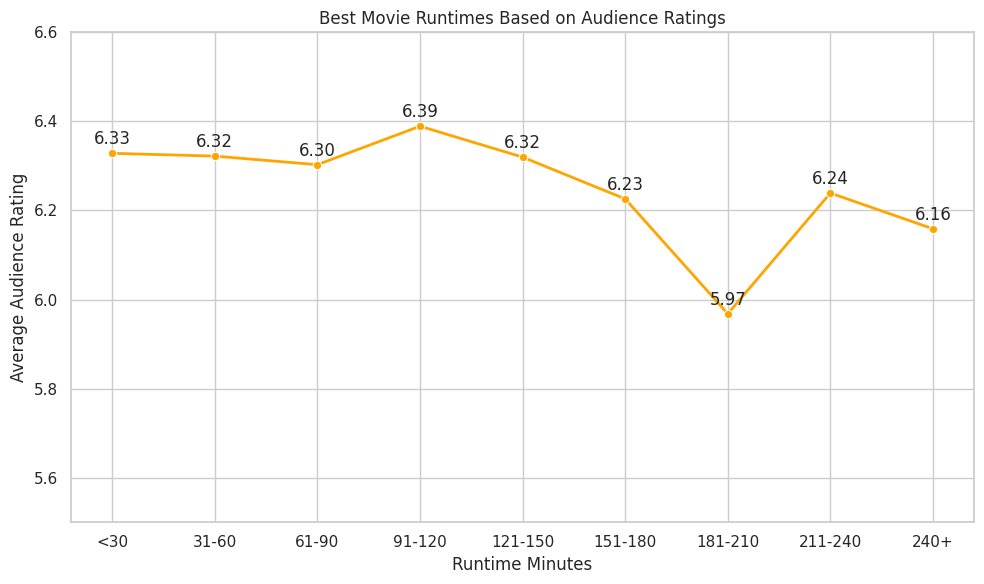

In [ ]:
# Converting to a dataframe of the best movie runtimes based on audience rating

runtime_minutes_df = pd.DataFrame ({
    'runtime_group': ['<30','31-60','61-90','91-120','121-150','151-180','181-210','211-240','240+'],
    'average_rating': [6.328365,6.322089,6.302823,6.389236,6.31981,6.226087,5.968182,6.23913,6.158824]
})

# Line Plot

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
ax = sns.lineplot(
    x='runtime_group', y='average_rating', data=runtime_minutes_df,
    marker='o', linestyle='-',
    color='orange', linewidth=2
)

for idx, val in enumerate(runtime_minutes_df['average_rating']):
    ax.text(idx, val + 0.02, f"{val:.2f}", ha='center')

# Setting the Title, xlabel and ylabel
ax.set_title('Best Movie Runtimes Based on Audience Ratings')
ax.set_xlabel('Runtime Minutes')
ax.set_ylabel('Average Audience Rating')
plt.ylim(5.5,6.6)
plt.tight_layout()
plt.show()


## Evaluation
The analysis provides clear insights into:
* The genres that receive high audience ratings
* The months of the year that are optimal for movie releases based on worldwide gross revenue
* The movie runtimes that best capture audience attention based on average audience ratings
* How the runtime, genre and release month contribute to a movie’s success

Based on these findings, Microsoft will be able to:
* Make data-driven decisions about which genres to focus their production budget on and which months are ideal for releasing their movies
* Understanding currect audience preferences in order to produce movies targeting them ensuring greater success as they enter a competitive market

The insights in this analysis were derived from identifying trends in the dataset, and the results were clearly presented through various visualizations.

Given the datasets used, the results are reasonably generalizable to the current market. With access to more data, this generalizability could be improved. However, even with the existing data, the findings offer a strong starting point for Microsoft.

These insights will enable Microsoft to make informed business decisions—such as producing movies in genres that align with audience interests and timing releases in high-performing months—which will help maximize their return on investment as a new player in the movie industry.


## Conclusions

**Recommendations**


---


Based on the analysis, the following recommendations are proposed:

**1.Focus on High-Performing Genres**

As a new  movie studio, Microsoft should prioritize genres that receive higher audience ratings. These include combination genres such as Comedy-documentary-fantasy and Documentary-musical-family. Unique genres like Game-show also appear to pique audience interest. Starting with the top three performing genres would increase the likelihood of early success.

**2. Releasing Movies during High-performing Months**

Releasing films during peak months—such as May, June and July—can significantly improve revenue. This would help offset the high initial costs Microsoft is likely to incur as a new entrant in the movie industry.

**3. Target Optimal Runtime**

Producing movies with runtimes between 90-120 minutes is likely to boost audience ratings and overall satisfaction.

**Limitations**

---



While the project has provided valuable insights, several limitations may have impacted the outcomes:
* Missing data reduced the sample size, potentially affecting the accuracy and generalizability of the results.
* The data did not factor in other additional costs incurred while producing the films. Including these would provide a more complete picture of a movie’s success.

**Future Recommendations**

---



To enhance the depth and accuracy of the analysis in the future, the following steps are recommended:
* Expand data sources to include revenue from streaming platforms versus cinema releases. This would help determine the most profitable distribution channels for Microsoft’s movies.
* Incorporate actor popularity data, such as the most watched and liked actors for specific genres. This would enable Microsoft to make informed casting decisions, increasing the potential for success in the industry.

